## Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples

In [2]:
mall_df = pd.read_csv('Mall_Customers.csv')
mall_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## EDA

In [3]:
revenu_annuel_moyen = mall_df["Annual Income (k$)"].mean()
print("Revenue annuel moyen :",revenu_annuel_moyen,'k$')
spending_score_mean = mall_df["Spending Score (1-100)"].mean()
print("Score Moyen :",spending_score_mean)
age_mean = mall_df["Age"].mean()
print("Age moyen :",age_mean)

Revenue annuel moyen : 60.56 k$
Score Moyen : 50.2
Age moyen : 38.85


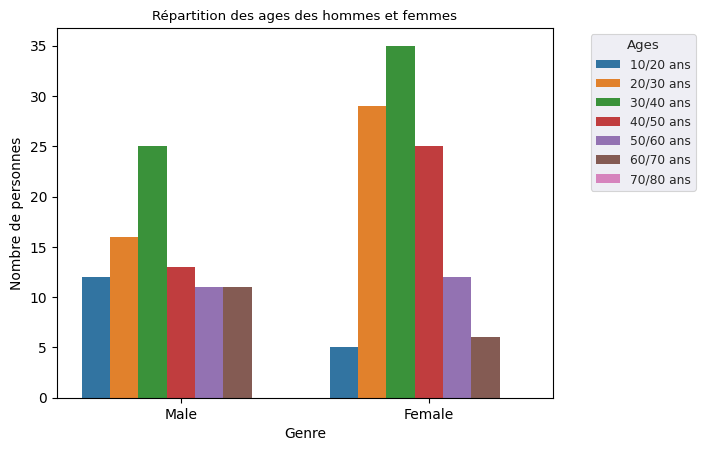

In [4]:
mall_df['Age_bins'] = pd.cut(x=mall_df['Age'], bins=[10, 20, 30,
                                          40, 50,60,70,80],labels =["(10, 20]" ,"(20, 30]" ,"(30, 40]" , "(40, 50]", "(50, 60]","(60, 70]","(70, 80]"])

ax = sns.countplot(data=mall_df, x = "Gender", hue = "Age_bins")
sns.set_theme(context='paper', style='darkgrid', palette='deep', font='sans-serif', 
                  font_scale=1, color_codes=True, rc=None)
plt.title("Répartition des ages des hommes et femmes")
ax.legend(title= "Ages",labels=["10/20 ans","20/30 ans","30/40 ans","40/50 ans","50/60 ans","60/70 ans","70/80 ans"])
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.3, 1))
plt.ylabel("Nombre de personnes")
plt.xlabel("Genre")
plt.show()

<Figure size 2000x2000 with 0 Axes>

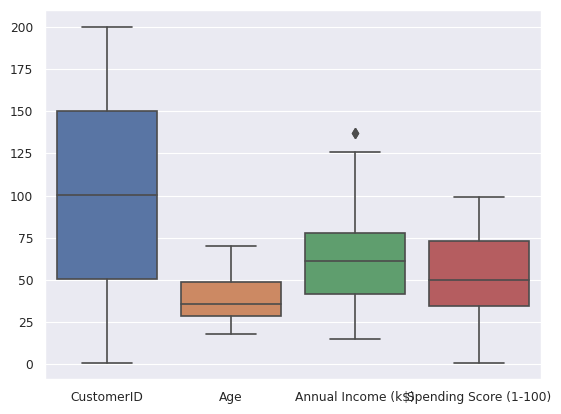

<Figure size 2000x2000 with 0 Axes>

In [5]:
sns.boxplot(data=mall_df)
plt.figure(figsize=[20,20])

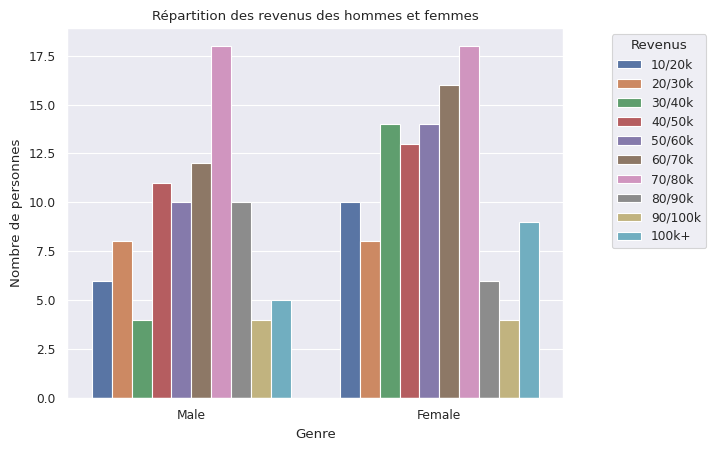

In [6]:
mall_df['revenus bins'] = pd.cut(x=mall_df["Annual Income (k$)"], bins=[10, 20, 30,
                                          40, 50,60,70,80,90,100,150],labels =["10/20k" ,"20/30k" ,"30/40k" , "40/50k", "50/60k","60/70k","70/80k","80/90k","90/100k","100k+"])
ax = sns.countplot(data=mall_df, x = "Gender", hue = "revenus bins")
sns.set_theme(context='paper', style='darkgrid', palette='deep', font='sans-serif', 
                  font_scale=1, color_codes=True, rc=None)
ax.legend(title= "Revenus")
plt.title("Répartition des revenus des hommes et femmes")
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.3, 1))
plt.ylabel("Nombre de personnes")
plt.xlabel("Genre")
plt.show()

## Encodage : One_Hot

In [7]:
enc = OneHotEncoder(sparse=False,drop="if_binary").fit(mall_df[["Gender"]])
encoded = enc.transform(mall_df[["Gender"]])
encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out())
mall_df_one_hot = pd.concat([mall_df,encoded_df],axis=1)
mall_df_one_hot = mall_df_one_hot.drop(["Gender"],axis=1)
mall_df_one_hot

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Age_bins,revenus bins,Gender_Male
0,1,19,15,39,"(10, 20]",10/20k,1.0
1,2,21,15,81,"(20, 30]",10/20k,1.0
2,3,20,16,6,"(10, 20]",10/20k,0.0
3,4,23,16,77,"(20, 30]",10/20k,0.0
4,5,31,17,40,"(30, 40]",10/20k,0.0
...,...,...,...,...,...,...,...
195,196,35,120,79,"(30, 40]",100k+,0.0
196,197,45,126,28,"(40, 50]",100k+,0.0
197,198,32,126,74,"(30, 40]",100k+,1.0
198,199,32,137,18,"(30, 40]",100k+,1.0


## Model : Agglomerative Clustering

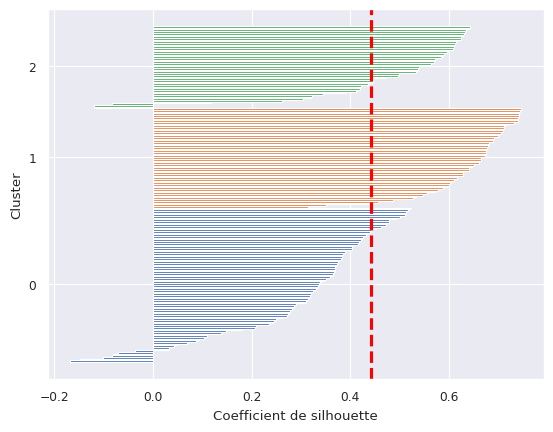

Silhouette Score : 0.4416668745000411


In [8]:
# Sélectionner les colonnes à utiliser pour le clustering
X = mall_df_one_hot[["Age","Spending Score (1-100)"]]

# Initialiser le modèle de clustering
model = AgglomerativeClustering(n_clusters=3, affinity = 'l2', linkage='complete')

# Effectuer le clustering sur les données
labels = model.fit_predict(X)

# Calculer le coefficient de silhouette pour chaque point
silhouette_vals = silhouette_samples(X, labels)

# Calculer la silhouette moyenne pour le dataset
silhouette_avg = np.mean(silhouette_vals)

# Tracer le diagramme de silhouette
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_vals = silhouette_vals[labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2.)
    y_lower += len(cluster_silhouette_vals)
sns.set_theme(context='talk', style='darkgrid', palette='deep', font='sans-serif', 
                  font_scale=1, color_codes=True, rc=None)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(labels))
plt.ylabel('Cluster')
plt.xlabel('Coefficient de silhouette')
plt.show()
print("Silhouette Score :",silhouette_avg)

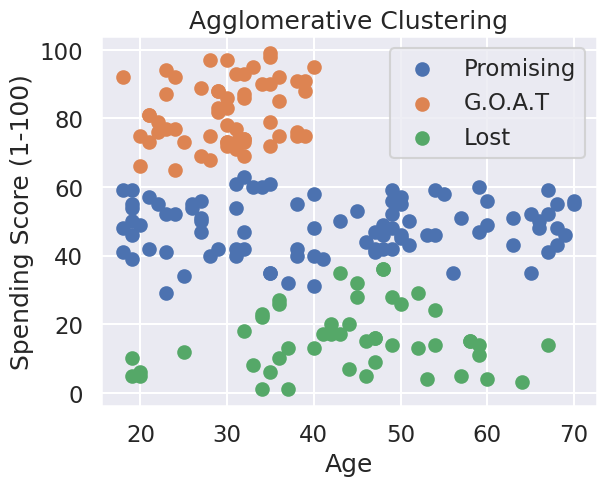

In [16]:
# Choose which features to plot against each other
feat1 = 'Age'
feat2 = 'Spending Score (1-100)'

# Create a DataFrame with the two features and the cluster labels
df = pd.DataFrame({'x': X[feat1], 'y': X[feat2], 'label': labels})

# Get a list of the unique cluster labels
clusters = df['label'].unique()

# Set up the plot
fig, ax = plt.subplots()

# Plot the data points for each cluster
for cluster in clusters:
    data = df[df['label'] == cluster]
    ax.scatter(data['x'], data['y'], label=f'Cluster {cluster}')

# Add legend and axis labels
ax.legend(labels=["Promising","G.O.A.T","Lost"])
ax.set_xlabel(feat1)
ax.set_ylabel(feat2)
ax.set_title('Agglomerative Clustering')

# Show the plot
plt.show()